In [35]:
# 2024 Airbnb Barcelona Listings Analysis
# This analysis explores Airbnb listings data for Barcelona in 2024, focusing on various aspects such as pricing, availability, neighborhood trends, and host behaviors. 
#The dataset contains information about listings, hosts, reviews, and other factors that contribute to understanding the dynamics of the local Airbnb market.

In [7]:
# Import necessary libraries
import sqlite3
import pandas as pd

In [11]:
# Load the CSV file
file_path = 'listings.csv'
df = pd.read_csv(file_path)

# View the first few rows to ensure the data loaded correctly
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,194.0,1,42,2024-06-03,0.31,28,72,3,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,304.0,3,79,2024-06-24,0.48,1,116,7,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,211.0,1,128,2024-09-05,0.80,3,319,32,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,300.0,5,20,2024-08-20,0.12,3,69,12,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,314.0,5,247,2024-09-02,1.46,3,241,37,HUTB-150671


In [13]:
# Create a connection to an SQLite database in memory
conn = sqlite3.connect(':memory:')
df.to_sql('listings', conn, index=False, if_exists='replace')

19482

In [15]:
# Function to execute SQL queries and save them to a file
def save_sql_queries(query_list, file_name):
    with open(file_name, 'w') as file:
        for query in query_list:
            file.write(query + "\n\n")

# Function to execute and display query results
def execute_and_display_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    for row in result:
        print(row)
    print("\n")

In [31]:
# Extended SQL Queries
queries = [
    # Existing Queries
    """
    -- Get the first 5 rows from the listings table
    SELECT * FROM listings LIMIT 5;
    """,
    """
    -- Count the number of listings available in Barcelona
    SELECT COUNT(*) AS total_listings FROM listings;
    """,
    """
    -- Find the average price of a listing in Barcelona
    SELECT AVG(price) AS average_price FROM listings;
    """,
    """
    -- Get the number of listings available for each neighborhood
    SELECT neighborhood, COUNT(*) AS listings_count
    FROM listings
    GROUP BY neighborhood
    ORDER BY listings_count DESC;
    """,
    """
    -- Find the listings with the highest price
    SELECT * FROM listings
    WHERE price = (SELECT MAX(price) FROM listings);
    """,
    """
    -- Find the number of listings in each room_type category
    SELECT room_type, COUNT(*) AS room_type_count
    FROM listings
    GROUP BY room_type
    ORDER BY room_type_count DESC;
    """,
    """
    -- Find the listings that have availability greater than 50 days
    SELECT * FROM listings
    WHERE availability_365 > 50;
    """,
    """
    -- Get the top 5 most expensive listings
    SELECT * FROM listings
    ORDER BY price DESC
    LIMIT 5;
    """,
    
    """
    -- Identify the listings with the highest number of reviews
    SELECT id, name, number_of_reviews
    FROM listings
    ORDER BY number_of_reviews DESC
    LIMIT 10;
    """,
    """
    -- Find hosts with the highest number of listings
    SELECT host_id, host_name, SUM(calculated_host_listings_count) AS total_listings
    FROM listings
    GROUP BY host_id, host_name
    ORDER BY total_listings DESC
    LIMIT 10;
    """,
    """
    -- Analyze neighborhoods with the most reviews
    SELECT neighborhood, SUM(number_of_reviews) AS total_reviews
    FROM listings
    GROUP BY neighborhood
    ORDER BY total_reviews DESC
    LIMIT 10;
    """,
    """
    -- Find neighborhoods with the highest average availability
    SELECT neighborhood, AVG(availability_365) AS avg_availability
    FROM listings
    GROUP BY neighborhood
    ORDER BY avg_availability DESC
    LIMIT 10;
    """,
    """
    -- Analyze minimum night distribution by room type
    SELECT room_type, AVG(minimum_nights) AS avg_minimum_nights, MAX(minimum_nights) AS max_minimum_nights
    FROM listings
    GROUP BY room_type
    ORDER BY avg_minimum_nights DESC;
    """,
    """
    -- Check listings with the highest reviews per month
    SELECT id, name, reviews_per_month
    FROM listings
    WHERE reviews_per_month IS NOT NULL
    ORDER BY reviews_per_month DESC
    LIMIT 10;
    """
]

# Save all queries to a single SQL file
save_sql_queries(queries, 'airbnb_2024_barcelona_analysis.sql')

In [19]:
# Example: Run and display the first query (Get the first 5 rows)
execute_and_display_query(queries[0])

(18674, 'Huge flat for 8 people close to Sagrada Familia', 71615, 'Mireia  Maria', 'Eixample', 'la Sagrada Família', 41.40556, 2.17262, 'Entire home/apt', 194.0, 1, 42, '2024-06-03', 0.31, 28, 72, 3, 'HUTB-002062')
(23197, 'Forum CCIB DeLuxe, Spacious, Large Balcony, relax', 90417, 'Etain (Marnie)', 'Sant Martí', 'el Besòs i el Maresme', 41.41243172529066, 2.219750335269476, 'Entire home/apt', 304.0, 3, 79, '2024-06-24', 0.48, 1, 116, 7, 'HUTB005057')
(32711, 'Sagrada Familia area - Còrsega 1', 135703, 'Nick', 'Gràcia', "el Camp d'en Grassot i Gràcia Nova", 41.40566, 2.17015, 'Entire home/apt', 211.0, 1, 128, '2024-09-05', 0.8, 3, 319, 32, 'HUTB-001722')
(34241, 'Stylish Top Floor Apartment - Ramblas Plaza Real', 73163, 'Andres', 'Ciutat Vella', 'el Barri Gòtic', 41.38062, 2.17517, 'Entire home/apt', 300.0, 5, 20, '2024-08-20', 0.12, 3, 69, 12, 'Exempt')
(34981, 'VIDRE HOME PLAZA REAL on LAS RAMBLAS', 73163, 'Andres', 'Ciutat Vella', 'el Barri Gòtic', 41.37978, 2.17623, 'Entire home/ap

<Axes: title={'center': 'Top 10 Neighborhoods by Listings Count'}, xlabel='neighbourhood'>

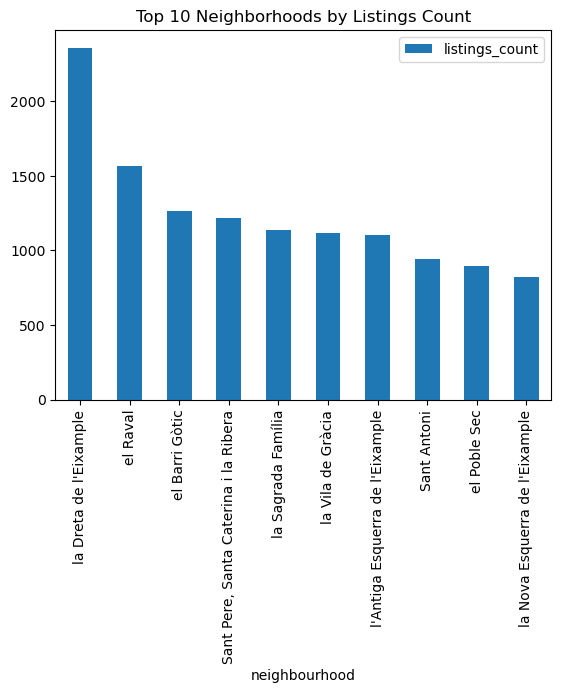

In [27]:
# Query to get the top 10 neighborhoods with the most listings
query = """
SELECT neighbourhood, COUNT(*) AS listings_count
FROM listings
GROUP BY neighbourhood
ORDER BY listings_count DESC
LIMIT 10
"""
df_neighborhood = pd.read_sql(query, conn)

# Plot the results for the top 10 neighborhoods
df_neighborhood.plot(kind='bar', x='neighbourhood', y='listings_count', title='Top 10 Neighborhoods by Listings Count')

In [29]:
# Example: Save the neighborhood analysis to a CSV file
df_neighborhood.to_csv('neighborhood_analysis.csv', index=False)

In [33]:
# Conclusion
#This analysis provided valuable insights into the Airbnb listings in Barcelona. Some key findings include:
# - Neighborhoods with the most listings and highest demand.
# - Price distribution across room types.
# - Host behaviors and their impact on the number of listings.

# Future work could explore price prediction models, the impact of reviews on pricing, or spatial analysis to identify emerging popular areas.